In [16]:
import math
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import sklearn.linear_model as lm
import sklearn.svm as svm
import sklearn.model_selection as mod_sel
import sklearn.metrics as met
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [3]:
from matplotlib import cm
def draw_scatter(pnt_2d, y, Title = None):
    C_map = cm.get_cmap('Spectral', 256)
    
    plt.figure(num=None, figsize=(16, 16), dpi=80, facecolor="w", edgecolor="k")
    
    plt.subplot(2, 2, 1)
    scatters = []
    z = y
    y_label = list(set(z))
    nl = len(y_label)-1
    for k, lbl in enumerate(y_label):
        n = y_label[k]
        scatters.append(plt.scatter(pnt_2d[z==n, 0], pnt_2d[z==n, 1], color=C_map(k/nl), label=lbl, s=4))
        
    plt.legend(tuple(scatters), tuple(y_label), scatterpoints=1, loc="upper right", ncol=1, fontsize=10)
    plt.xlabel('UC 1')
    plt.ylabel('UC 2')
    if Title is not None:
        plt.title(Title, fontsize=11)
    plt.grid()

In [9]:
file_name = "../data/scores.csv"
df = pd.read_csv(file_name)
print(df)
print("Data size (n_sample, n_features): ", end="")
print(df.shape)

X = df.iloc[:, 1:4]
y = df.Group
label = list(set(y))

print(X.shape)
print('Target names: ', label)

   Group  English  Math  Science
0      A       77    72       75
1      A       81    67       68
2      A       74    74       72
3      A       89    64       68
4      A       78    71       74
..   ...      ...   ...      ...
95     B       75    81       77
96     B       65    84       77
97     B       75    77       73
98     B       72    82       79
99     B       74    75       72

[100 rows x 4 columns]
Data size (n_sample, n_features): (100, 4)
(100, 3)
Target names:  ['B', 'A']


In [10]:
file_name = "../data/cancer_gene_exp.csv"
df = pd.read_csv(file_name, index_col=0)
print('Data size (n_sample, n_features): ', end="")
print(df.shape)

X = df.iloc[:, 1:]
y = df.Tumor_type
label = list(set(y))

print(X.shape)
print("Target names: ", label)

Data size (n_sample, n_features): (1655, 101)
(1655, 100)
Target names:  ['CESC', 'ESCA', 'THYM', 'SARC', 'LUAD', 'PCPG', 'THCA', 'UCEC', 'COAD']


In [11]:
df

Tumor_type  PSMB11|122706  PAX1|5075  DNTT|1791  C14orf23|387978  \
TCGA-2W-A8YY       CESC           0.00       4.37       0.00             0.78   
TCGA-4J-AA1J       CESC           0.00       0.00       0.89             0.00   
TCGA-BI-A0VR       CESC           0.00       0.00       0.00             0.00   
TCGA-BI-A0VS       CESC           0.00       0.00       0.00             0.00   
TCGA-BI-A20A       CESC           0.00       0.00       0.73             0.00   
...                 ...            ...        ...        ...              ...   
TCGA-QS-A8F1       UCEC           0.00       0.00       0.00             2.05   
TCGA-SJ-A6ZI       UCEC           0.00       0.00       0.00             0.95   
TCGA-SJ-A6ZJ       UCEC           1.21       0.00       0.53             0.00   
TCGA-SL-A6J9       UCEC           0.77       1.04       0.77             0.77   
TCGA-SL-A6JA       UCEC           0.00       1.12       0.00             0.00   

              CCL25|6370  IGLL1|3543  ARL5C|390790  ST8SIA3|51046  RAG2|5897  \
TCGA-2W-A8YY        0.44        0.00          0.00           1.28       0.00   
TCGA-4J-AA1J        0.00        0.00          0.00           0.00       0.00   
TCGA-BI-A0VR        2.18        2.30          0.00           0.00       0.00   
TCGA-BI-A0VS        0.43        1.62          0.43           0.00       0.76   
TCGA-BI-A20A        1.73        0.41          0.00           0.00       0.00   
...                  ...         ...           ...            ...        ...   
TCGA-QS-A8F1        4.62        0.00          0.00           2.52       0.00   
TCGA-SJ-A6ZI        2.14        0.70          0.00           1.35       0.39   
TCGA-SJ-A6ZJ        3.78        0.53          0.00           0.53       0.00   
TCGA-SL-A6J9        7.47        0.00          0.00           0.00       0.00   
TCGA-SL-A6JA        0.00        0.83          0.00           0.00       0.00   

              ...  C10orf129|142827  SFTPA1|653509  TCERG1L|256536  \
TCGA-2W-A8YY  ...              0.00           0.00            1.05   
TCGA-4J-AA1J  ...              0.00           0.51            0.00   
TCGA-BI-A0VR  ...              0.48           0.48            0.00   
TCGA-BI-A0VS  ...              0.00           2.04            1.25   
TCGA-BI-A20A  ...              0.00           0.00            0.41   
...           ...               ...            ...             ...   
TCGA-QS-A8F1  ...              0.00           1.36            3.15   
TCGA-SJ-A6ZI  ...              0.00           0.39            1.17   
TCGA-SJ-A6ZJ  ...              0.00           0.00            2.31   
TCGA-SL-A6J9  ...              0.00           0.00            0.77   
TCGA-SL-A6JA  ...              0.00           0.00            1.74   

              LOC730811|730811  TFAP2B|7021  PCSK2|5126  KCNQ2|3785  \
TCGA-2W-A8YY               0.0         2.67        1.05        1.05   
TCGA-4J-AA1J               0.0         1.83        0.89        0.00   
TCGA-BI-A0VR               0.0         3.08        0.48        0.00   
TCGA-BI-A0VS               0.0         1.44        2.04        0.43   
TCGA-BI-A20A               0.0         0.41        0.00        0.00   
...                        ...          ...         ...         ...   
TCGA-QS-A8F1               0.0         0.00        3.38        3.38   
TCGA-SJ-A6ZI               0.0         1.17        0.39        0.70   
TCGA-SJ-A6ZJ               0.0         0.91        0.53        1.68   
TCGA-SL-A6J9               0.0         0.00        2.05        0.43   
TCGA-SL-A6JA               0.0         7.40        1.90        3.26   

              C7orf16|10842  PABPC1L2B|645974  GALR1|2587  
TCGA-2W-A8YY           0.44              0.44        0.00  
TCGA-4J-AA1J           0.00              0.00        0.89  
TCGA-BI-A0VR           0.00              0.00        0.00  
TCGA-BI-A0VS           0.00              0.00        0.43  
TCGA-BI-A20A           0.00              0.00        0.00  
...                     .

In [12]:
y

TCGA-2W-A8YY    CESC
TCGA-4J-AA1J    CESC
TCGA-BI-A0VR    CESC
TCGA-BI-A0VS    CESC
TCGA-BI-A20A    CESC
                ... 
TCGA-QS-A8F1    UCEC
TCGA-SJ-A6ZI    UCEC
TCGA-SJ-A6ZJ    UCEC
TCGA-SL-A6J9    UCEC
TCGA-SL-A6JA    UCEC
Name: Tumor_type, Length: 1655, dtype: object

In [13]:
X.shape

(1655, 100)

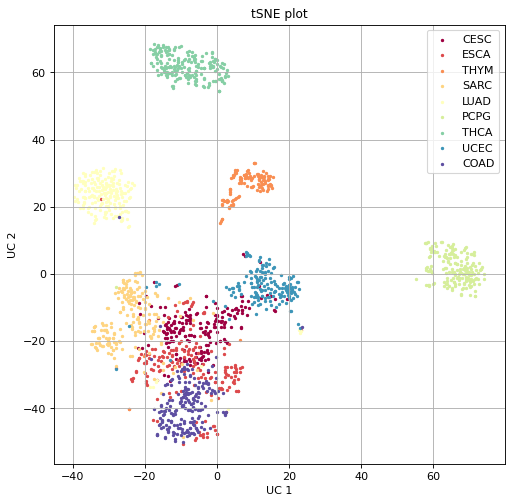

In [14]:
X_2d = TSNE(learning_rate=300, init="pca").fit_transform(X)
draw_scatter(X_2d, y, 'tSNE plot')

In [19]:
classifier = lm.LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter = 2000)

In [20]:
X_train, X_test, y_train, y_test = mod_sel.train_test_split(X, y, test_size=0.3, random_state=5)

classifier.fit(X_train, y_train)

LogisticRegression(max_iter=2000, multi_class='multinomial')

In [23]:
classifier.coef_, classifier.intercept_

(array([[ 8.13040357e-02, -4.04304943e-01,  2.65618561e-01,
         -3.54795316e-01, -4.37393370e-01,  1.58560077e-01,
         -3.61990463e-01, -5.03726388e-02, -2.25942676e-01,
          1.55595998e-01,  1.46893348e-01,  2.77773050e-01,
         -2.07950170e-01, -1.47601971e-01, -4.09884407e-01,
         -7.63531565e-02,  9.29937360e-02,  1.36047844e-01,
         -4.35973014e-01, -5.20262445e-01, -2.69070061e-01,
          1.76342886e-01, -7.16733389e-01, -2.04244285e-01,
         -3.24465941e-01, -3.94385722e-01,  4.58226027e-01,
          6.77495365e-02,  1.49274295e-01,  5.65446504e-01,
         -3.00123596e-02,  2.11784222e-02, -1.10686166e-02,
         -2.79404777e-01, -6.96324822e-02,  7.23414180e-01,
         -3.50456808e-02, -4.47134844e-02,  4.14621936e-01,
         -7.75161231e-02, -2.47589816e-02, -2.57782025e-01,
         -4.52121168e-01, -7.83485227e-02, -4.66854212e-02,
         -1.25102105e-01,  9.78879779e-01,  3.24604656e-01,
         -3.03260870e-01, -1.12901066e-0

In [38]:
classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 2000,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [26]:
classifier.coef_.shape, classifier.intercept_.shape

((9, 100), (9,))

In [27]:
y_pred = classifier.predict(X_test)

accuracy = 100*sum(y_test==y_pred)/len(y_test)

y_pred_train = classifier.predict(X_train)
accuracy_train = 100*sum(y_train==y_pred_train)/len(y_train)

print("Accuracy(Naive) = %f, %f" % (round(accuracy,2), round(accuracy_train, 2)))

Accuracy(Naive) = 91.550000, 100.000000


In [30]:
classifier.classes_

array(['CESC', 'COAD', 'ESCA', 'LUAD', 'PCPG', 'SARC', 'THCA', 'THYM',
       'UCEC'], dtype=object)

In [29]:
y_prob = classifier.predict_proba(X_test)

df_y_prob = pd.DataFrame(y_prob)
df_y_prob['y_pred'] = y_pred
df_y_prob

0             1             2             3             4  \
0    9.999496e-01  4.725010e-07  6.603364e-07  3.154753e-07  1.263808e-08   
1    2.577820e-07  9.036826e-01  9.631241e-02  4.083746e-08  6.850881e-08   
2    2.562718e-08  3.120838e-06  2.119269e-05  1.685510e-08  4.912455e-08   
3    4.996679e-02  9.603713e-03  9.282570e-01  8.883764e-04  9.871213e-06   
4    2.143905e-03  3.183293e-04  9.973413e-01  1.301649e-04  5.109209e-07   
..            ...           ...           ...           ...           ...   
492  5.357775e-01  2.912410e-06  7.087697e-03  3.894010e-04  7.254093e-05   
493  1.070419e-03  2.545596e-05  3.617855e-07  9.982305e-01  3.316777e-08   
494  4.033336e-01  1.215459e-04  1.529953e-02  6.081836e-07  7.410073e-07   
495  8.259187e-04  4.669292e-13  3.413031e-12  7.093808e-12  8.634560e-11   
496  1.171539e-08  1.340502e-08  1.900608e-11  9.999999e-01  6.455597e-12   

                5             6             7             8 y_pred  
0    2.107686e-05  1.091708e-07  4.224934e-07  2.736657e-05   CESC  
1    1.449159e-07  1.168114e-07  3.010823e-06  1.401499e-06   COAD  
2    9.998120e-01  7.152629e-07  5.552006e-07  1.623582e-04   SARC  
3    1.105917e-02  1.100354e-04  9.900946e-05  6.011383e-06   ESCA  
4    4.104983e-05  1.573205e-05  8.883367e-06  1.607907e-07   ESCA  
..            ...           ...           ...           ...    ...  
492  4.558606e-01  1.314031e-06  1.758138e-04  6.321642e-04   CESC  
493  7.565348e-07  5.049783e-04  1.674128e-04  1.247687e-07   LUAD  
494  5.811447e-01  1.252607e-05  5.807316e-05  2.869168e-05   SARC  
495  2.746918e-06  7.206546e-09  2.835561e-09  9.991713e-01   UCEC  
496  1.798135e-09  4.747270e-08  2.152752e-09  1.322127e-12   LUAD  

[497 rows x 10 columns]

In [33]:
NCV = 5

accuracies = mod_sel.cross_val_score(classifier, X, y, scoring="accuracy", cv=NCV, verbose=2, n_jobs=4)
accuracy = 100*accuracies.mean()
# accuracy
print("Accuracy(CV) via cross validation = %5.3f" % accuracy)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Accuracy(CV) via cross validation = 92.810


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    1.8s finished


In [34]:
y_pred = mod_sel.cross_val_predict(classifier, X, y, cv=NCV, verbose=2, n_jobs=4)
c_mat = met.confusion_matrix(y, y_pred)
print("Confusion Matrix: ")
print(c_mat)
print("Classification Report: ")
print(met.classification_report(y, y_pred, target_names=label))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Confusion Matrix: 
[[165   2  11   0   0   6   0   0  16]
 [  5 189   4   1   1   0   0   0   0]
 [ 12   8 161   1   0   0   0   0   0]
 [  1   4   4 190   0   1   0   0   0]
 [  0   0   0   0 182   1   0   0   0]
 [  7   1   4   1   0 183   0   0   4]
 [  0   0   1   0   0   0 199   0   0]
 [  0   1   2   0   0   0   0 117   0]
 [ 17   0   0   1   1   1   0   0 150]]
Classification Report: 
              precision    recall  f1-score   support

        CESC       0.80      0.82      0.81       200
        ESCA       0.92      0.94      0.93       200
        THYM       0.86      0.88      0.87       182
        SARC       0.98      0.95      0.96       200
        LUAD       0.99      0.99      0.99       183
        PCPG       0.95      0.92      0.93       200
        THCA       1.00      0.99      1.00       200
        UCEC       1.00      0.97      0.99       120
        COAD       0.88      0.88      0.88       170

    accuracy                           0.93      1655
   macro 

[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    1.8s finished


In [39]:
param_grid = {'penalty': ['l2', 'l1'], 'C': [10, 100, 1000], 'multi_class': ['multinomial'], 'solver': ['lbfgs'], 'max_iter': [200, 1000],}

In [40]:
clf = mod_sel.GridSearchCV(classifier, param_grid, cv=NCV, scoring='accuracy', verbose=2, n_jobs=4)
clf.fit(X, y)

best_param = clf.best_params_
print("Best Score: " + str(round(clf.best_score_*100,2)) + "with parameters", end = "")
print(clf.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/chadongjun/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.92386707        nan 0.9244713         nan 0.91903323        nan
 0.92205438        nan 0.91540785        nan 0.92205438        nan]
  warnings.warn(


Best Score: 92.45with parameters{'C': 10, 'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}


/Users/chadongjun/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
